In [1]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Step 1: Load the dataset
data = pd.read_csv('Oder3.csv')
data.head(20)

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,10/30/2016 9:58,Morning,Weekend
1,2,Scandinavian,10/30/2016 10:05,Morning,Weekend
2,2,Scandinavian,10/30/2016 10:05,Morning,Weekend
3,3,Hot chocolate,10/30/2016 10:07,Morning,Weekend
4,3,Jam,10/30/2016 10:07,Morning,Weekend
5,3,Cookies,10/30/2016 10:07,Morning,Weekend
6,4,Muffin,10/30/2016 10:08,Morning,Weekend
7,5,Coffee,10/30/2016 10:13,Morning,Weekend
8,5,Pastry,10/30/2016 10:13,Morning,Weekend
9,5,Bread,10/30/2016 10:13,Morning,Weekend


In [8]:
# Assuming 'Order ID' is the identifier for each transaction and 'Item' is the product column
transactions = data.groupby('TransactionNo')['Items'].apply(list).tolist()
transactions[2:10]

[['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna']]

In [4]:
# Step 3: Create a DataFrame for one-hot encoding
encoder = TransactionEncoder()
onehot = encoder.fit(transactions).transform(transactions)
df = pd.DataFrame(onehot, columns=encoder.columns_)

print(df.shape)
df.head()

(9465, 94)


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
print(onehot.shape)
print(onehot)

(9465, 94)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [6]:
# Step 4: Apply Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

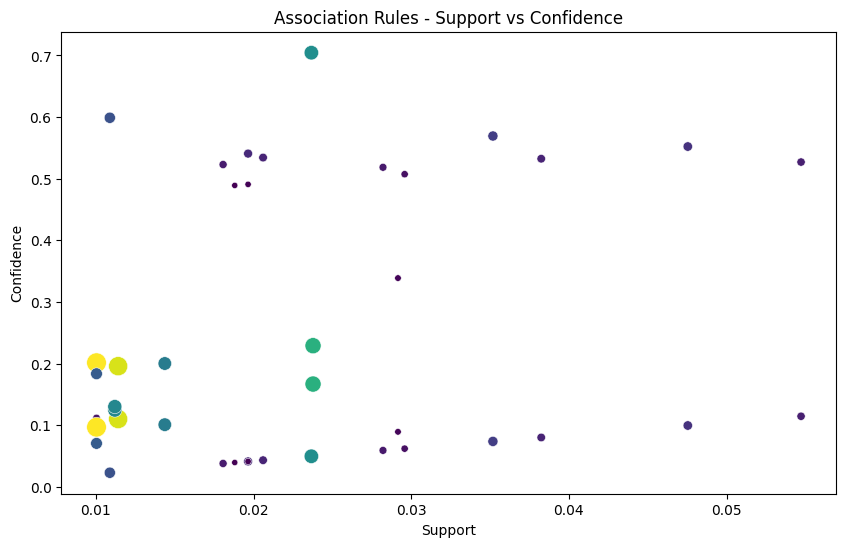

         antecedents       consequents   support  confidence      lift
0        (Alfajores)          (Coffee)  0.019651    0.540698  1.130235
1           (Coffee)       (Alfajores)  0.019651    0.041078  1.130235
2            (Bread)          (Pastry)  0.029160    0.089119  1.034977
3           (Pastry)           (Bread)  0.029160    0.338650  1.034977
4           (Coffee)         (Brownie)  0.019651    0.041078  1.025860
5          (Brownie)          (Coffee)  0.019651    0.490765  1.025860
6             (Cake)          (Coffee)  0.054728    0.526958  1.101515
7           (Coffee)            (Cake)  0.054728    0.114399  1.101515
8    (Hot chocolate)            (Cake)  0.011410    0.195652  1.883874
9             (Cake)   (Hot chocolate)  0.011410    0.109868  1.883874
10             (Tea)            (Cake)  0.023772    0.166667  1.604781
11            (Cake)             (Tea)  0.023772    0.228891  1.604781
12         (Cookies)          (Coffee)  0.028209    0.518447  1.083723
13    

In [7]:
# Step 5: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 6: Visualize the raules
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', palette='viridis', legend=False)
plt.title('Association Rules - Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Display rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])